<a href="https://colab.research.google.com/github/bnarath/TF_Developer/blob/main/Neural_Network_Regression_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes

## Regression Problems Examples

- Selling price/number prediction
- Coordinates of bounding boxes in object detection

## Definition
- Independent variables/features/covariates/predictors
- Dependent variables/Prediction variable

## Inputs and Outputs
- INPUTS - **Numerical encoded** meaningful features
  - shape = (#samples, #features)
- OUTPUTS - A numerical number
  - shape = (#samples, desired prediction shape)

## Neural Network Architecture Hyperparameters
- Input layer shape = # of features
- No. of hidden layers : Problem specific. 1+
- Neurons per hidden layer : Problem specific. In general 10 to 100
- Output layer shape = desired prediction shape
- Hidden activation : Usually ReLu
- Output activation : None
- Loss function : MSE, MAE, Huber Loss function
- Optimizer: SGD, Adam

## Steps in modelling with TensorFlow
- **Building a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
- **Compiling a model** - define the **loss funtion** (in other words, the function which tells our model how wrong it is) and the **optimizer** (tells our model how to improve the patterns its learning) and **evaluation metrics** (what we can use to interpret the performance of our model).
- **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

```python
#Set random seed
tf.random.set_seed(10)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#complie
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.mae])

#fit
model.fit(X, y, epochs=5)

```

## Model evauation
- model.evaluate


## Metrics
- tf.keras.metrics
    - mae, mse, huber etc

## Saving model
  - Two formats
    - hdf5 (if we go outside tensorflow)
    - saved model format (best within tensorflow)

## Download the model from colab
```
from google.colab import files
files.download("best_model.h5")

# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp -r best_model drive/MyDrive/Tensorflow_Developer_Certificate_Jan15_2023/Test_models
```

## Larger example using Kaggle Data
- Source: https://www.kaggle.com/datasets/mirichoi0218/insurance
- Github data: https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

- Preprocessing:
  - pandas: pd.get_dummies(df) : All object dtypes will be one hot encoded
  - sklearn.compose import make_column_transformer (To do many transformations together with fit/transform)
  - sklearn.preprocessing -> OneHotEncoder, StandardScaler, MinMaxScaler

```
# Preprocessing

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance["charges"]

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

ct.fit(X_train)

X_train_processed = ct.transform(X_train)
X_test_processed = ct.transform(X_test)

```

- Train Test Split
```
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
```

- Model Train

```
#Build tensorflow regression model

tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.8, beta_2=0.9, epsilon=1e-7),
              metrics=[tf.keras.metrics.mae])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_processed, y_train, epochs=100, verbose=1, callbacks=[callback], validation_data=(X_test_processed, y_test),)
```
- Early Stopping as tf.keras.callback.EarlyStopping

- History
```
records losses and metrics ['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error']
```

In [99]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# Creating data

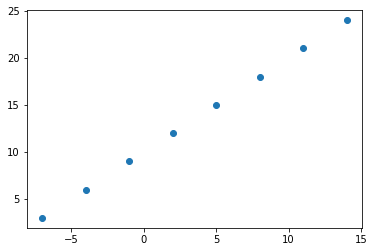

In [100]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [101]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [102]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape, X[0].ndim, y[0].ndim

((), (), 0, 0)

# Turn numpy arrays to tensors

In [103]:
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

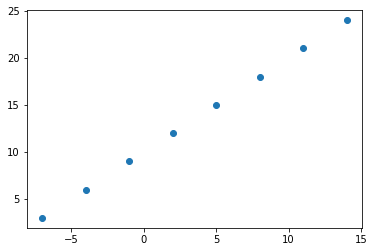

In [104]:
plt.scatter(X, y)

In [105]:
X.ndim, X.shape
X = tf.expand_dims(X, axis=-1)
X.ndim, X.shape

(2, TensorShape([8, 1]))

In [106]:
#Set random seed
tf.random.set_seed(10)

#Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


#complie
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.mae])

#fit
model.fit(X, y, epochs=5)




Epoch 1/5
1/1 [==============================] - 0s 314ms/step - loss: 11.7523 - mean_absolute_error: 11.7523
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.6198 - mean_absolute_error: 11.6198
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.4873 - mean_absolute_error: 11.4873
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3548 - mean_absolute_error: 11.3548
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 11.2223 - mean_absolute_error: 11.2223


In [107]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [108]:
# tf.random.set_seed(10)

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

# model.compile(loss=tf.keras.losses.mae,
#               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
#               metrics=[tf.keras.metrics.mae])


# model.fit(X, y, epochs=10, batch_size=5)

In [109]:
model.evaluate(X, y)

1/1 [==============================] - 0s 107ms/step - loss: 11.0898 - mean_absolute_error: 11.0898


[11.089761734008789, 11.089761734008789]

In [110]:
X[2], model.predict(X[2])

1/1 [==============================] - 0s 89ms/step


(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-1.], dtype=float32)>,
 array([[-0.62435365]], dtype=float32))

## Improving the model


1. Change the mode - Increase #hidden units, #hidden layers, activation function
1. Change learning rate, optimizer function
1. Increase epoch, more data

In [111]:
tf.random.set_seed(10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.mae]
)

model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 424ms/step - loss: 14.4922 - mean_absolute_error: 14.4922
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.7897 - mean_absolute_error: 13.7897
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0897 - mean_absolute_error: 13.0897
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3919 - mean_absolute_error: 12.3919
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.6957 - mean_absolute_error: 11.6957
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9992 - mean_absolute_error: 10.9992
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.3000 - mean_absolute_error: 10.3000
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 9.5947 - mean_absolute_error: 9.5947
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 8.8795 - mean_absolute_error: 8.8795
Epoch 10/1

In [112]:
X, y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [113]:
model.predict([10])

1/1 [==============================] - 0s 183ms/step


array([[19.55871]], dtype=float32)

# Evaluate the model

In [114]:
X = tf.range(-100, 100, 4, dtype=tf.float32)
y = X + 10

X = tf.expand_dims(X, axis=-1)

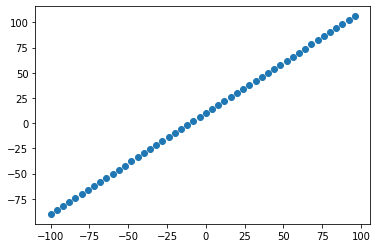

In [115]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [116]:
n = int(X.shape[0]*0.8)
X_train = X[:n]
y_train = y[:n]

X_test = X[n:]
y_test = y[n:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

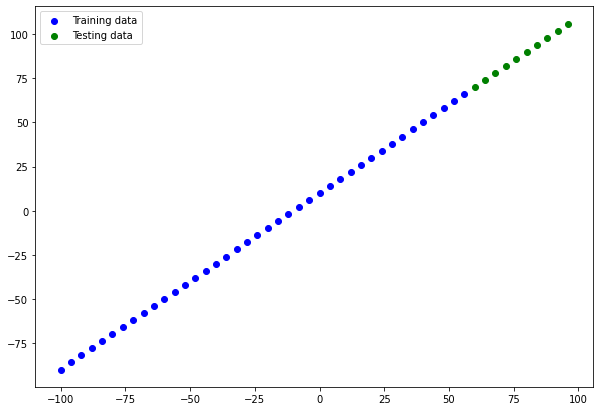

In [117]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data") # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend();

In [118]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.008),
    metrics = [tf.keras.metrics.mae]
)

model.fit(
    X, y, epochs=100
)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 62.0873 - mean_absolute_error: 62.0873
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 48.3673 - mean_absolute_error: 48.3673
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 34.2126 - mean_absolute_error: 34.2126
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 20.8509 - mean_absolute_error: 20.8509
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.3223 - mean_absolute_error: 10.3223
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0266 - mean_absolute_error: 11.0266
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 16.5959 - mean_absolute_error: 16.5959
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 18.5671 - mean_absolute_error: 18.5671
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 16.5465 - mean_absolute_error: 16.5465
Epoch 10/1

In [119]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                100       
                                                                 
 dense_51 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


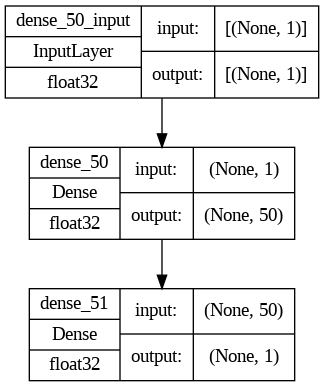

In [120]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True)

In [121]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 50ms/step


In [122]:
y_pred, y_test

(array([[ 69.70237 ],
        [ 73.679794],
        [ 77.65723 ],
        [ 81.63464 ],
        [ 85.61207 ],
        [ 89.5895  ],
        [ 93.56692 ],
        [ 97.54435 ],
        [101.521774],
        [105.4992  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [123]:

# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();
     

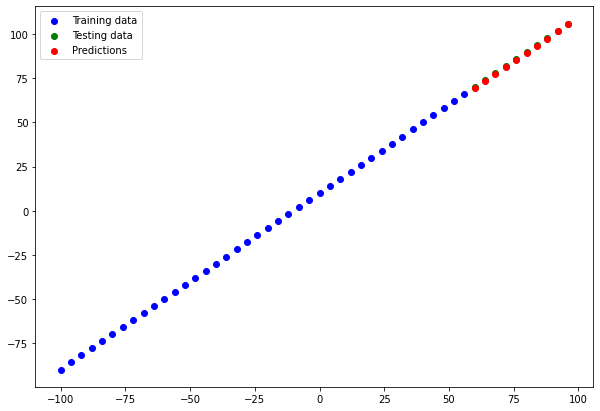

In [124]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

In [125]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 116ms/step - loss: 0.3992 - mean_absolute_error: 0.3992


[0.3992149233818054, 0.3992149233818054]

In [126]:
mae = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred)) # or tf.metrics.mean_absolute_error(y_test, y_pred)

In [127]:
tf.keras.metrics.mse(y_test, tf.squeeze(y_pred)) #tf.metrics.mean_squared_error

<tf.Tensor: shape=(), dtype=float32, numpy=0.16357747>

# Running experiments to improve our model
- Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
- Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
- Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
- Train for longer - give your model more of a chance to find patterns in the data.

1. model_1 - 2 layer (hidden unit -> 50 to 100), trained for 100 epochs
1. model_2 - 3 layers, trained for 100 epochs
1. model_3 - 3 layers, trained for 500 epochs


## Build model_1


1. model_1 - 2 layer (hidden unit -> 50 to 100), trained for 100 epochs

In [128]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(100, activation=None),
     tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.008),
    metrics = [tf.keras.metrics.mae]
)

model.fit(
    X, y, epochs=100
)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 50.3187 - mean_absolute_error: 50.3187
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 31.7213 - mean_absolute_error: 31.7213
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4650 - mean_absolute_error: 13.4650
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 11.5210 - mean_absolute_error: 11.5210
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 16.9423 - mean_absolute_error: 16.9423
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 15.7237 - mean_absolute_error: 15.7237
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 10.5373 - mean_absolute_error: 10.5373
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4720 - mean_absolute_error: 8.4720
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5910 - mean_absolute_error: 9.5910
Epoch 10/100


In [129]:
y_pred_m1 = model.predict(X_test)

1/1 [==============================] - 0s 57ms/step


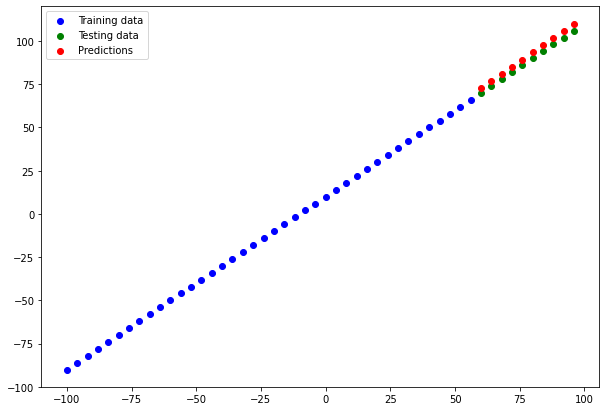

In [130]:
plot_predictions(X_train, y_train, X_test, y_test, tf.squeeze(y_pred_m1))

In [131]:
mae_m1 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred_m1))
mse_m1 = tf.keras.metrics.mse(y_test, tf.squeeze(y_pred_m1))
mae_m1 < mae, mae, mae_m1, mse_m1

(<tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.3992157>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.2919335>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.072354>)

# Build model_2

1. model_2 - 3 layers, trained for 100 epochs

In [132]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.mae]
)

model.fit(
    X, y, epochs=100
)




Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 47.4293 - mean_absolute_error: 47.4293
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 30.9995 - mean_absolute_error: 30.9995
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 21.7171 - mean_absolute_error: 21.7171
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 13.2951 - mean_absolute_error: 13.2951
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0963 - mean_absolute_error: 19.0963
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1500 - mean_absolute_error: 11.1500
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1413 - mean_absolute_error: 11.1413
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.6321 - mean_absolute_error: 11.6321
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5484 - mean_absolute_error: 7.5484
Epoch 10/100

1/1 [==============================] - 0s 52ms/step


(<tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.3992157>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.1459099>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.3309793>)

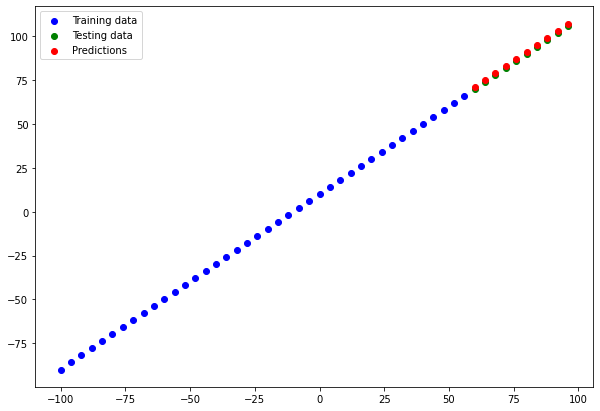

In [133]:
y_pred_m2 = model.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, tf.squeeze(y_pred_m2))

mae_m2 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred_m2))
mse_m2 = tf.keras.metrics.mse(y_test, tf.squeeze(y_pred_m2))
mae_m2 < mae, mae, mae_m2, mse_m2

# Build model_3

1. model_3 - 3 layers, trained for 200 epochs


In [134]:
tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)
    ]
)

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.mae]
)

model.fit(
    X, y, epochs=200
)




Epoch 1/200
2/2 [==============================] - 0s 9ms/step - loss: 47.4293 - mean_absolute_error: 47.4293
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 30.9995 - mean_absolute_error: 30.9995
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 21.7171 - mean_absolute_error: 21.7171
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 13.2951 - mean_absolute_error: 13.2951
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 19.0963 - mean_absolute_error: 19.0963
Epoch 6/200
2/2 [==============================] - 0s 6ms/step - loss: 11.1500 - mean_absolute_error: 11.1500
Epoch 7/200
2/2 [==============================] - 0s 7ms/step - loss: 11.1413 - mean_absolute_error: 11.1413
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 11.6321 - mean_absolute_error: 11.6321
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 7.5484 - mean_absolute_error: 7.5484
Epoch 10/200

1/1 [==============================] - 0s 55ms/step


(<tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.3992157>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.262082>,
 <tf.Tensor: shape=(), dtype=float32, numpy=39.998737>)

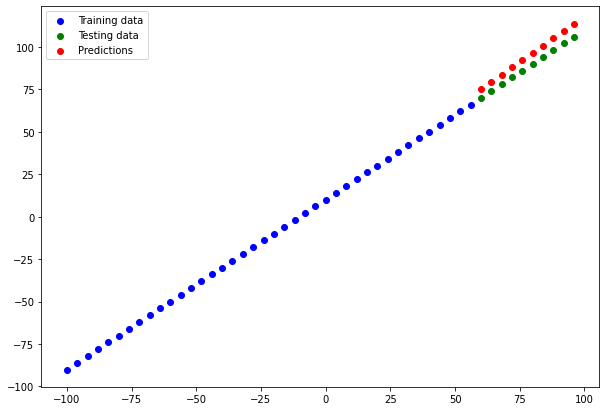

In [135]:
y_pred_m3 = model.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, tf.squeeze(y_pred_m3))

mae_m3 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred_m3))
mse_m3 = tf.keras.metrics.mse(y_test, tf.squeeze(y_pred_m3))
mae_m3 < mae, mae, mae_m3, mse_m3

## Comparing the results of our experiments

In [136]:
mae.numpy()

0.3992157

In [137]:
import pandas as pd

model_results = [["model_1", mae_m1.numpy(), mse_m1.numpy()], ["model_2", mae_m2.numpy(), mse_m2.numpy()], ["model_3", mae_m3.numpy(), mse_m3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

all_results

,model,mae,mse
0,model_1,3.291934,11.072354
1,model_2,1.145910,1.330979
2,model_3,6.262082,39.998737


## Tracking experiments

## Saving our models

In [138]:
tf.random.set_seed(10)

model2 = tf.keras.Sequential(
    [
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)
    ]
)

model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.mae]
)

model2.fit(
    X, y, epochs=100
)


Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 47.4293 - mean_absolute_error: 47.4293
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 30.9995 - mean_absolute_error: 30.9995
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 21.7171 - mean_absolute_error: 21.7171
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 13.2951 - mean_absolute_error: 13.2951
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 19.0963 - mean_absolute_error: 19.0963
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1500 - mean_absolute_error: 11.1500
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1413 - mean_absolute_error: 11.1413
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6321 - mean_absolute_error: 11.6321
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 7.5484 - mean_absolute_error: 7.5484
Epoch 10/100

1/1 [==============================] - 0s 48ms/step


(<tf.Tensor: shape=(), dtype=bool, numpy=False>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.3992157>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.1459099>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.3309793>)

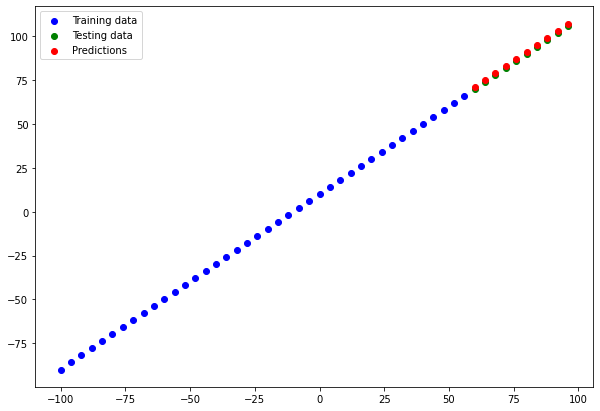

In [139]:
y_pred_m2 = model2.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, tf.squeeze(y_pred_m2))

mae_m2 = tf.keras.metrics.mae(y_test, tf.squeeze(y_pred_m2))
mse_m2 = tf.keras.metrics.mse(y_test, tf.squeeze(y_pred_m2))
mae_m2 < mae, mae, mae_m2, mse_m2

In [140]:
model2.save("best_model")

In [141]:
model2.save("best_model.h5")

In [142]:
tf.keras.models.save_model(model2, "best_model")

In [143]:
tf.keras.models.save_model(model2, "best_model.h5")

## Loading Model

In [144]:
loaded_model_1 = tf.keras.models.load_model("best_model")
loaded_model_1.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                100       
                                                                 
 dense_61 (Dense)            (None, 50)                2550      
                                                                 
 dense_62 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [145]:
loaded_model_2 = tf.keras.models.load_model("best_model.h5")
loaded_model_2.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 50)                100       
                                                                 
 dense_61 (Dense)            (None, 50)                2550      
                                                                 
 dense_62 (Dense)            (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [146]:
y_pred_loaded_m1 = loaded_model_1.predict(X_test)
y_pred_loaded_m2 = loaded_model_2.predict(X_test)

1/1 [==============================] - 0s 60ms/step


In [147]:
np.count_nonzero(np.squeeze((y_pred_loaded_m2 == y_pred_m2) & (y_pred_loaded_m2 == y_pred_m2)))

10

# Download a model (or any other file) from Google Colab

In [148]:
# from google.colab import files
# files.download("best_model.h5")

# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
# !cp -r best_model drive/MyDrive/Tensorflow_Developer_Certificate_Jan15_2023/Test_models

# A larger Example

https://www.kaggle.com/datasets/mirichoi0218/insurance

https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv



In [149]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [150]:

# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [151]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [152]:

# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [153]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [154]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [155]:

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [156]:
#Build tensorflow regression model

tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=[tf.keras.metrics.mae])

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 12834.4678 - mean_absolute_error: 12834.4678
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 10517.6396 - mean_absolute_error: 10517.6396
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 7687.4849 - mean_absolute_error: 7687.4849
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 7403.1729 - mean_absolute_error: 7403.1729
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 7328.3564 - mean_absolute_error: 7328.3564
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7246.3857 - mean_absolute_error: 7246.3857
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7163.4194 - mean_absolute_error: 7163.4194
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7072.8276 - mean_absolute_error: 7072.8276
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - l

In [157]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3866.9558 - mean_absolute_error: 3866.9558


[3866.955810546875, 3866.955810546875]

In [158]:
y_train.mean(), y_train.median()

(13199.839422541123, 9273.6388)

# Improve the model

- Change various Optimizer parameters

In [159]:
#Build tensorflow regression model

tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.8, beta_2=0.9, epsilon=1e-7),
              metrics=[tf.keras.metrics.mae])

history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 9186.0400 - mean_absolute_error: 9186.0400
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7012.6943 - mean_absolute_error: 7012.6943
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 6485.6079 - mean_absolute_error: 6485.6079
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 6197.4844 - mean_absolute_error: 6197.4844
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 5943.7939 - mean_absolute_error: 5943.7939
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 5613.2271 - mean_absolute_error: 5613.2271
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5079.5576 - mean_absolute_error: 5079.5576
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4372.5161 - mean_absolute_error: 4372.5161
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss:

In [160]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3896.4114 - mean_absolute_error: 3896.4114


[3896.411376953125, 3896.411376953125]

Text(0, 0.5, 'loss/mae')

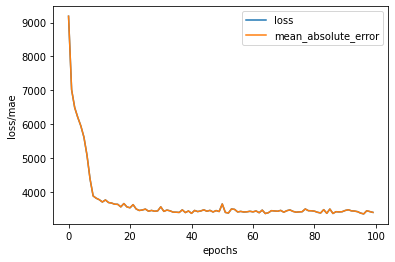

In [161]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss/mae")

In [162]:
#Build tensorflow regression model

tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.8, beta_2=0.9, epsilon=1e-7),
              metrics=[tf.keras.metrics.mae])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=100, verbose=1, callbacks=[callback], validation_data=(X_test, y_test),)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 9186.0400 - mean_absolute_error: 9186.0400 - val_loss: 7484.5122 - val_mean_absolute_error: 7484.5122
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7012.6943 - mean_absolute_error: 7012.6943 - val_loss: 6845.4883 - val_mean_absolute_error: 6845.4883
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 6485.6079 - mean_absolute_error: 6485.6079 - val_loss: 6539.7065 - val_mean_absolute_error: 6539.7065
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6197.4844 - mean_absolute_error: 6197.4844 - val_loss: 6325.3882 - val_mean_absolute_error: 6325.3882
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5943.7939 - mean_absolute_error: 5943.7939 - val_loss: 6226.5596 - val_mean_absolute_error: 6226.5596
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 5613.2271 - mean_absolute_error: 5613.2271 - val_los

In [163]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4032.7009 - mean_absolute_error: 4032.7009


[4032.700927734375, 4032.700927734375]

Text(0, 0.5, 'loss/mae')

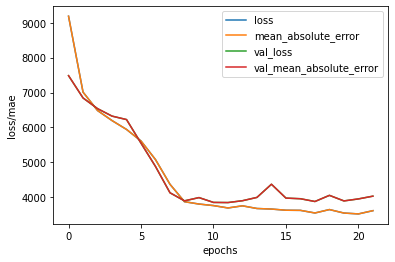

In [164]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss/mae")

In [166]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

# Preprocessing Extras

1. Standardization/Normalization
    - MinMaxScaler (0 to 1 range, keeps the shape of the distribution)
    - StandardScaler (reduces outlier effects; preferred; changes the distribution to normal)



In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance
     

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [179]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [180]:
# Preprocessing

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance["charges"]

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

ct.fit(X_train)

X_train_processed = ct.transform(X_train)
X_test_processed = ct.transform(X_test)


In [210]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [217]:
X_train_processed[0]

array([0.02173913, 0.52649987, 0.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [219]:

X_train.shape, X_train_processed.shape

((1070, 6), (1070, 11))

In [229]:
#Build tensorflow regression model

tf.random.set_seed(10)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(50),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1, beta_1=0.8, beta_2=0.9, epsilon=1e-7),
              metrics=[tf.keras.metrics.mae])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train_processed, y_train, epochs=100, verbose=1, callbacks=[callback], validation_data=(X_test_processed, y_test),)

Epoch 1/100
34/34 [==============================] - 1s 6ms/step - loss: 12282.6299 - mean_absolute_error: 12282.6299 - val_loss: 10562.9082 - val_mean_absolute_error: 10562.9082
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 8650.5420 - mean_absolute_error: 8650.5420 - val_loss: 7862.1567 - val_mean_absolute_error: 7862.1567
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7578.5640 - mean_absolute_error: 7578.5640 - val_loss: 7232.4443 - val_mean_absolute_error: 7232.4443
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 6838.6943 - mean_absolute_error: 6838.6943 - val_loss: 6419.8491 - val_mean_absolute_error: 6419.8491
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 5702.0278 - mean_absolute_error: 5702.0278 - val_loss: 4978.9331 - val_mean_absolute_error: 4978.9331
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 4215.2129 - mean_absolute_error: 4215.2129 - val

In [230]:
model.evaluate(X_test_processed, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3879.5305 - mean_absolute_error: 3879.5305


[3879.530517578125, 3879.530517578125]

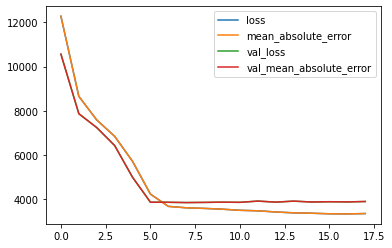

In [231]:
pd.DataFrame(history.history).plot()

In [232]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 50)                600       
                                                                 
 dense_84 (Dense)            (None, 1)                 51        
                                                                 
Total params: 651
Trainable params: 651
Non-trainable params: 0
_________________________________________________________________
